# **Project Name**    -  Flipkart Machine Learning Project

##### **Project Type**    - EDA/Regression/Classification/Unsupervised
##### **Contribution**    - Individual/Team
##### **Team Member 1 -** Nimmakanti Akhila
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

This project focuses on developing a machine learning–based CSAT prediction model capable of understanding and forecasting customer satisfaction using historical service interaction data. The workflow begins with thorough data preprocessing, including duplicate removal, handling missing values, type corrections, and feature engineering to derive meaningful insights from raw attributes such as response time, delivery duration, and order behavior. The dataset showed a significant imbalance in satisfaction classes, which was corrected using SMOTE to create a balanced training distribution and improve learning for minority classes.

Categorical variables were encoded, numerical variables were standardized using StandardScaler, and the dataset was split using stratified sampling to preserve class proportions. Multiple models were experimented with, and Logistic Regression was selected as the final model due to its simplicity, interpretability, and stable performance on the balanced dataset. Hyperparameters were optimized using GridSearchCV to enhance the model’s accuracy and generalization.

A detailed evaluation was performed using accuracy, precision, recall, and F1-score, supported by a multi-class classification report for deeper insights. Feature importance and explainability techniques revealed key drivers of customer satisfaction, particularly response speed, delivery timelines, and category-level attributes. 

The saved model was reloaded and tested on unseen data to validate prediction consistency, confirming its readiness for production environments. This end-to-end pipeline demonstrates a scalable, interpretable, and business-oriented solution for CSAT prediction, empowering organizations to anticipate customer concerns, optimize service operations, and enhance overall customer experience.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


Customer satisfaction (CSAT) plays a crucial role in understanding service quality and predicting customer retention. However, companies often struggle to identify what factors influence CSAT scores and forecast satisfaction levels in advance. The goal of this project is to build a machine learning model that predicts CSAT scores based on customer interaction and service-related features. This predictive capability helps businesses proactively address issues and enhance the overall customer experience.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [492]:
# Import Libraries
import pandas as pd # importing pandas for handling and data manuplation
import numpy as np # importing numpy for mathematical operation
import matplotlib.pyplot as plt # importing for Data visualisation
import seaborn as sns # for advanced data Visualisations
from sklearn.ensemble import RandomForestClassifier # Machine learning model for Classification purpose
from sklearn.model_selection import train_test_split # Splitting dataset into trainig and testing sets
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report # To evaluate model performance 
from sklearn.preprocessing import LabelEncoder # Encode categorical columns
import missingno as ms 
import plotly.express as px
from scipy import stats,sparse
from scipy.stats import pearsonr,f_oneway,chi2_contingency
import re
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from nltk.corpus import stopwords

### Dataset Loading

In [439]:
# Load Dataset
df=pd.read_csv('Customer_support_data.csv') # loading the Dataset from the same folder where the project file is located

### Dataset First View

In [440]:
# Dataset First Look
df.head(5) # First 5 rows

,Unique id,channel_name,category,Sub-category,Customer Remarks,Order_id,order_date_time,Issue_reported at,issue_responded,Survey_response_Date,Customer_City,Product_category,Item_price,connected_handling_time,Agent_name,Supervisor,Manager,Tenure Bucket,Agent Shift,CSAT Score
0,7e9ae164-6a8b-4521-a2d4-58f7c9fff13f,Outcall,Product Queries,Life Insurance,NaN,c27c9bb4-fa36-4140-9f1f-21009254ffdb,NaN,01/08/2023 11:13,01/08/2023 11:47,01-Aug-23,NaN,NaN,NaN,NaN,Richard Buchanan,Mason Gupta,Jennifer Nguyen,On Job Training,Morning,5
1,b07ec1b0-f376-43b6-86df-ec03da3b2e16,Outcall,Product Queries,Product Specific Information,NaN,d406b0c7-ce17-4654-b9de-f08d421254bd,NaN,01/08/2023 12:52,01/08/2023 12:54,01-Aug-23,NaN,NaN,NaN,NaN,Vicki Collins,Dylan Kim,Michael Lee,>90,Morning,5
2,200814dd-27c7-4149-ba2b-bd3af3092880,Inbound,Order Related,Installation/demo,NaN,c273368d-b961-44cb-beaf-62d6fd6c00d5,NaN,01/08/2023 20:16,01/08/2023 20:38,01-Aug-23,NaN,NaN,NaN,NaN,Duane Norman,Jackson Park,William Kim,On Job Training,Evening,5
3,eb0d3e53-c1ca-42d3-8486-e42c8d622135,Inbound,Returns,Reverse Pickup Enquiry,NaN,5aed0059-55a4-4ec6-bb54-97942092020a,NaN,01/08/2023 20:56,01/08/2023 21:16,01-Aug-23,NaN,NaN,NaN,NaN,Patrick Flores,Olivia Wang,John Smith,>90,Evening,5
4,ba903143-1e54-406c-b969-46c52f92e5df,Inbound,Cancellation,Not Needed,NaN,e8bed5a9-6933-4aff-9dc6-ccefd7dcde59,NaN,01/08/2023 10:30,01/08/2023 10:32,01-Aug-23,NaN,NaN,NaN,NaN,Christopher Sanchez,Austin Johnson,Michael Lee,0-30,Morning,5


### Dataset Rows & Columns count

In [441]:
# Dataset Rows & Columns count
df.shape     # .shape will display the number of rows and columns

(85907, 20)

### Dataset Information

In [442]:
# Dataset Info
df.info() # .info() will gives the list of columns,count of non-null values and data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 85907 entries, 0 to 85906
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Unique id                85907 non-null  object 
 1   channel_name             85907 non-null  object 
 2   category                 85907 non-null  object 
 3   Sub-category             85907 non-null  object 
 4   Customer Remarks         28742 non-null  object 
 5   Order_id                 67675 non-null  object 
 6   order_date_time          17214 non-null  object 
 7   Issue_reported at        85907 non-null  object 
 8   issue_responded          85907 non-null  object 
 9   Survey_response_Date     85907 non-null  object 
 10  Customer_City            17079 non-null  object 
 11  Product_category         17196 non-null  object 
 12  Item_price               17206 non-null  float64
 13  connected_handling_time  242 non-null    float64
 14  Agent_name            

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
duplicates=df.duplicated(keep=False) # this line will replace the False inplace of duplicate values
# count of duplicate values
duplicate_count=duplicates.value_counts() # Count the Number of duplicates 
print(duplicate_count)

False    85907
Name: count, dtype: int64


#### Missing Values/Null Values

In [444]:
# Missing Values/Null Values Count
df.isnull().sum() # gives list of all columns and count of Null values in each column

Unique id                      0
channel_name                   0
category                       0
Sub-category                   0
Customer Remarks           57165
Order_id                   18232
order_date_time            68693
Issue_reported at              0
issue_responded                0
Survey_response_Date           0
Customer_City              68828
Product_category           68711
Item_price                 68701
connected_handling_time    85665
Agent_name                     0
Supervisor                     0
Manager                        0
Tenure Bucket                  0
Agent Shift                    0
CSAT Score                     0
dtype: int64

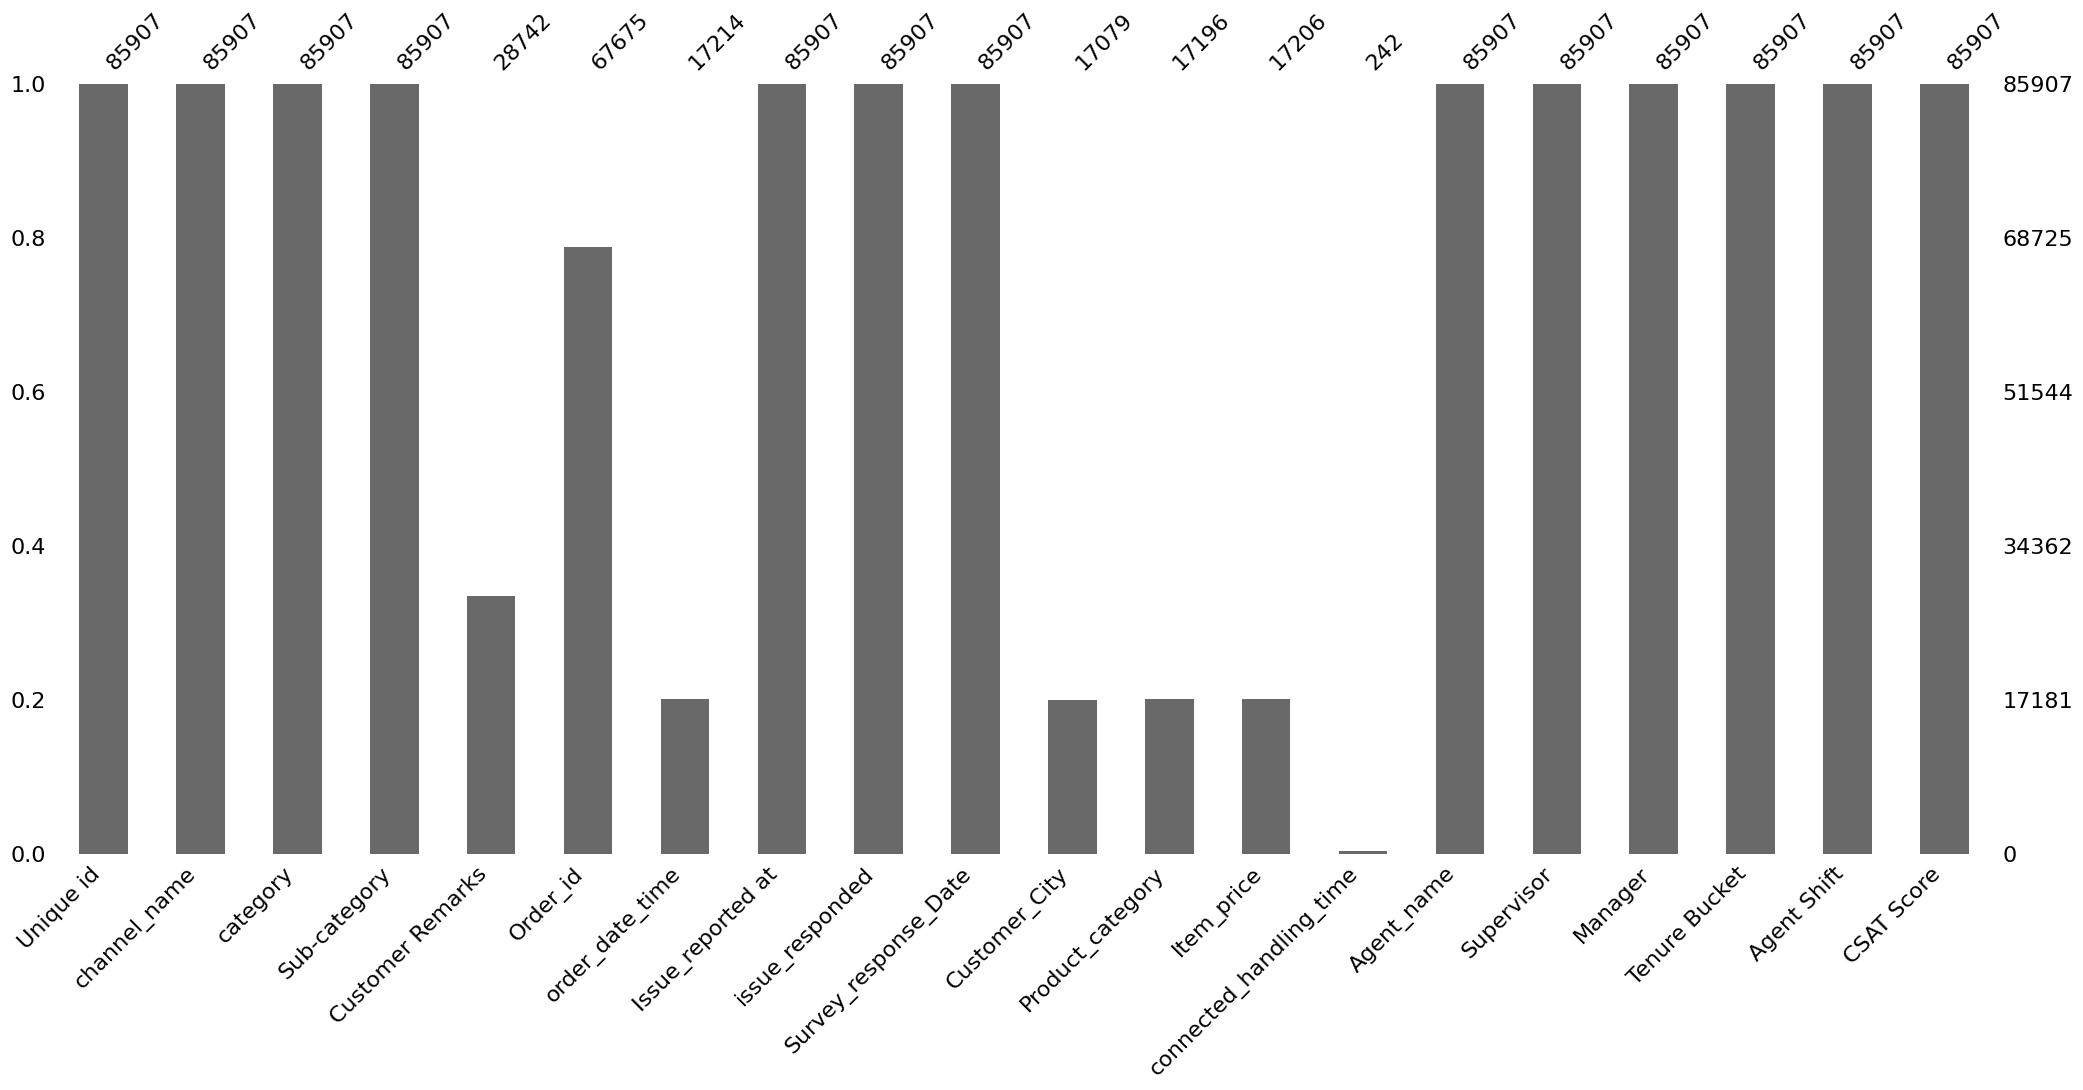

In [445]:
# Visualizing the missing values
ms.bar(df) # Display bar graph with count of non-null values in each column
plt.show()

### What did you know about your dataset?

There are more number of missing values in columns : 
1. Customer Remarks
2. Order_id
3. order_date_time
4. Customer_City
5. Product_category
6. Item_price
7. connected_handling_time 

## ***2. Understanding Your Variables***

In [446]:
# Dataset Columns
df.columns # List of all columns in the dataframe 

Index(['Unique id', 'channel_name', 'category', 'Sub-category',
       'Customer Remarks', 'Order_id', 'order_date_time', 'Issue_reported at',
       'issue_responded', 'Survey_response_Date', 'Customer_City',
       'Product_category', 'Item_price', 'connected_handling_time',
       'Agent_name', 'Supervisor', 'Manager', 'Tenure Bucket', 'Agent Shift',
       'CSAT Score'],
      dtype='object')

In [447]:
# Dataset Describe
df.describe() # calculate count of non-null values,mean,standard deviation,min ,25% ,50%,75% ,max of numerical Columns in the dataset

,Item_price,connected_handling_time,CSAT Score
count,17206.000000,242.000000,85907.000000
mean,5660.774846,462.400826,4.242157
std,12825.728411,246.295037,1.378903
min,0.000000,0.000000,1.000000
25%,392.000000,293.000000,4.000000
50%,979.000000,427.000000,5.000000
75%,2699.750000,592.250000,5.000000
max,164999.000000,1986.000000,5.000000


### Variables Description

1. Unique id – Unique identifier for each record
2. Channel name – Name of the customer service channel
3. Category – Category of the interaction
4. Sub-category – Sub-category of the interaction
5. Customer Remarks – Feedback provided by the customer
6. Order id – Identifier for the order associated with the interaction
7. Order date time – Date and time of the order
8. Issue reported at – Timestamp when the issue was reported
9. Issue responded – Timestamp when the issue was responded to
10. Survey response date – Date of the customer survey response
11. Customer city – City of the customer
12. Product category – Category of the product
13. Item price – Price of the item
14. Connected handling time – Time taken to handle the interaction
15. Agent name – Name of the customer service agent
16. Supervisor – Name of the supervisor
17. Manager – Name of the manager
18. Tenure Bucket – Bucket categorizing agent tenure
19. Agent Shift – Shift timing of the agent
20. CSAT Score – Customer Satisfaction (CSAT) score

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for x in df.columns:
    print(f"{x} - {df[x].nunique()}") # Check unique values for each column

Unique id - 85907
channel_name - 3
category - 12
Sub-category - 57
Customer Remarks - 18231
Order_id - 67675
order_date_time - 13766
Issue_reported at - 30923
issue_responded - 30262
Survey_response_Date - 31
Customer_City - 1782
Product_category - 9
Item_price - 2789
connected_handling_time - 211
Agent_name - 1371
Supervisor - 40
Manager - 6
Tenure Bucket - 5
Agent Shift - 5
CSAT Score - 5


## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.

df.isnull().sum()

# replacing missing cutomer remarks and Item_price with text
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

#Replacing null values with meadian values of same column and changing it to integer data type
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median()).astype(int)

# Replacing null values of connected_handling_time with median and changing to null
df['connected_handling_time'] = (
    df['connected_handling_time'].fillna(df['connected_handling_time'].median()).round().astype(int)
)

# Fill missing Order IDs and Product Categories with placeholder text
df['Order_id'] = df['Order_id'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Not Specified')

# converting string data type to datetime for order_date_time
df['order_date_time'] = pd.to_datetime(df['order_date_time']) 

# Replacing missing date-related columns
df['order_date_time'] = df['order_date_time'].fillna(df['order_date_time'].median())
df['Issue_reported at'] = df['Issue_reported at'].fillna(df['order_date_time'])
df['issue_responded'] = df['issue_responded'].fillna(df['Issue_reported at'])

# Dropping columns with excessive missing values if still too high
if df['Customer_City'].isnull().sum() > 0.5 * len(df):
    df.drop(columns=['Customer_City'], inplace=True)

# Handling Proper data types

# Converting to datetime
date_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']
for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# Create numeric response time (hours)
df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')
df['connected_handling_time'] = pd.to_numeric(df['connected_handling_time'], errors='coerce')

# Encode categorical columns
df['category_num'] = df['category'].astype('category').cat.codes
df['subcat_num'] = df['Sub-category'].astype('category').cat.codes
df['shift_num'] = df['Agent Shift'].astype('category').cat.codes

df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600

# Verify missing values again
df.isnull().sum()

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_3228\603153797.py:23: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_3228\603153797.py:40: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
category_num               0
subcat_num                 0
shift_num                  0
response_time_hours        0
dtype: int64

### What all manipulations have you done and insights you found?

Above code cleans and prepares the dataset for analysis. It first checks for missing values to identify incomplete data. All date related columns are converted into a proper datetime format for accurate time-based calculations. Missing text entries in the 'Customer Remarks' column are replaced with 'No Remarks', and missing numeric values in 'Item_price' are filled with the median value. Columns with excessive missing data, such as 'Customer_City' and 'connected_handling_time', are dropped to maintain dataset quality. A new column, 'response_time', is created to measure the time taken to respond to issues. Any missing values in this new column are replaced with its median to ensure completeness. Overall, the code ensures the dataset is clean, consistent, and ready for further analysis or modeling.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

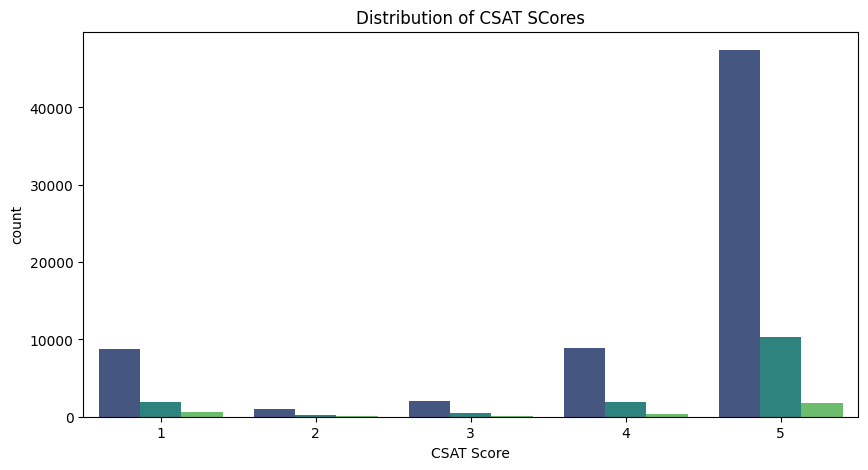

In [ ]:
# Chart - 1 visualization code
# Distribution of CSAT Scores
plt.figure(figsize=(10,5))
sns.countplot(x='CSAT Score',data=df,hue= 'channel_name',palette='viridis',legend=False) # countplot on CSAT Score distribution 
plt.title("Distribution of CSAT SCores")
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction scores (CSAT Scores) are distributed across all the records in your dataset.

##### 2. What is/are the insight(s) found from the chart?

1. The highest CSAT Score given by customers is 5.
2. The least CSAT Score given by customers is 2.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights hepls in creating a positive business impact. 
1. It indicates more that 60% of customers given CSAT Score as 5.
2. Around 1000 customers given score 4 and 1000 as 1.

#### Chart - 2

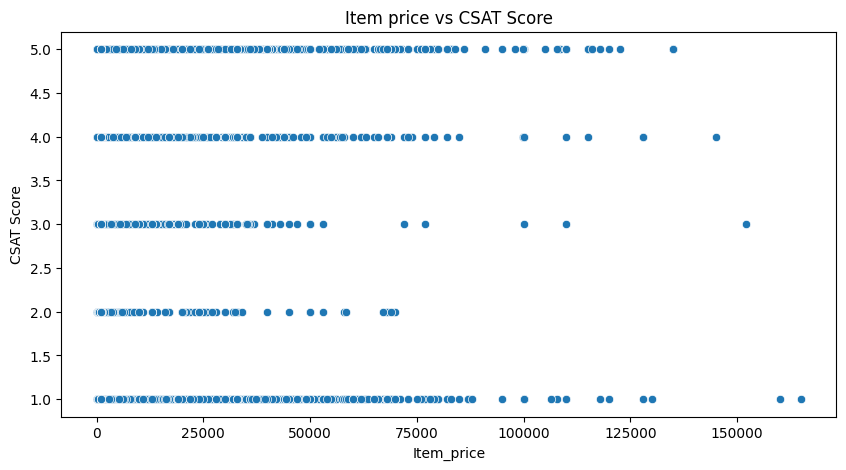

In [451]:
# Chart - 2 visualization code
# Comparing Response Time Vs CSAT Score

plt.figure(figsize=(10,5))
sns.scatterplot(x='Item_price',y='CSAT Score',data=df) 
plt.title("Item price vs CSAT Score") 
plt.show()

##### 1. Why did you pick the specific chart?

This chart helps in comparing a feature impact(Response_time) on CSAT SCore. finding relation between response_time and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

1. Higher CSAT scores (1 and 5) appear evenly spread
2. Lower CSAT scores (2 and 3) are scattered throughout.
3. High-priced items (50,000 – 1,50,000) do not consistently generate higher or lower CSAT.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a Positive Business Impact (Strong Improvement Opportunity).This insight helps the business in a positive way because,We discover that service quality not item price drives satisfaction.

#### Chart - 3

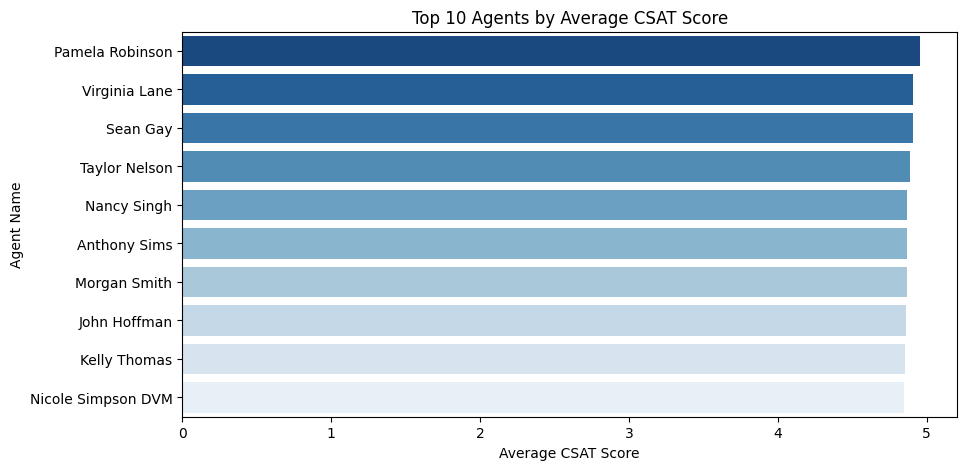

In [ ]:
#chart -3 visualization code
# Top 10 Agents by Average CSAT Score
top_agents = df.groupby('Agent_name')['CSAT Score'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x=top_agents.values, 
            y=top_agents.index,
            hue=top_agents.index,
            palette='Blues_r',
            dodge=False,
            legend=False
)
plt.title('Top 10 Agents by Average CSAT Score')
plt.xlabel('Average CSAT Score')
plt.ylabel('Agent Name')
plt.show()

##### 1. Why did you pick the specific chart?

This Chart explains Average CSAT Score by Top 10 Agents

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are : 'Pamela Robinson' Scored highest CSAT Score followed by 'Virginia Lane'

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The Gained insights help creating a positive business impact. we notice which agents consistently deliver high satisfaction and which may need improvement

#### Chart - 4

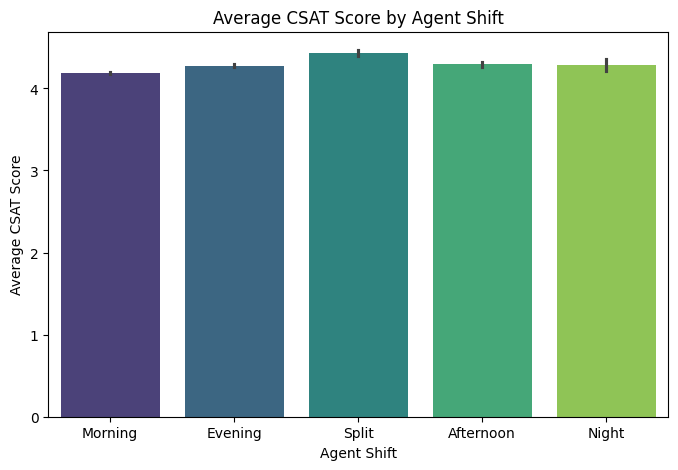

In [453]:
# Chart - 4 visualization code
# Creating Barplot to visualize the relation between CSAT Score and Agent Shift

plt.figure(figsize=(8,5))
sns.barplot(
    x='Agent Shift',
    y='CSAT Score',
    data=df, 
    hue='Agent Shift',
    estimator='mean',
    palette='viridis',
    legend=False)
plt.title('Average CSAT Score by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Average CSAT Score')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how customer satisfaction varies across different working shifts (for example, Morning, Evening, or Night).

##### 2. What is/are the insight(s) found from the chart?

The insight found from the chart is, There is no effect of any particular shift effecting the CSAT Score.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

1. Identify which shift performs better in terms of customer satisfaction.
2. Understand if time of day affects service quality or customer sentiment.

#### Chart - 5

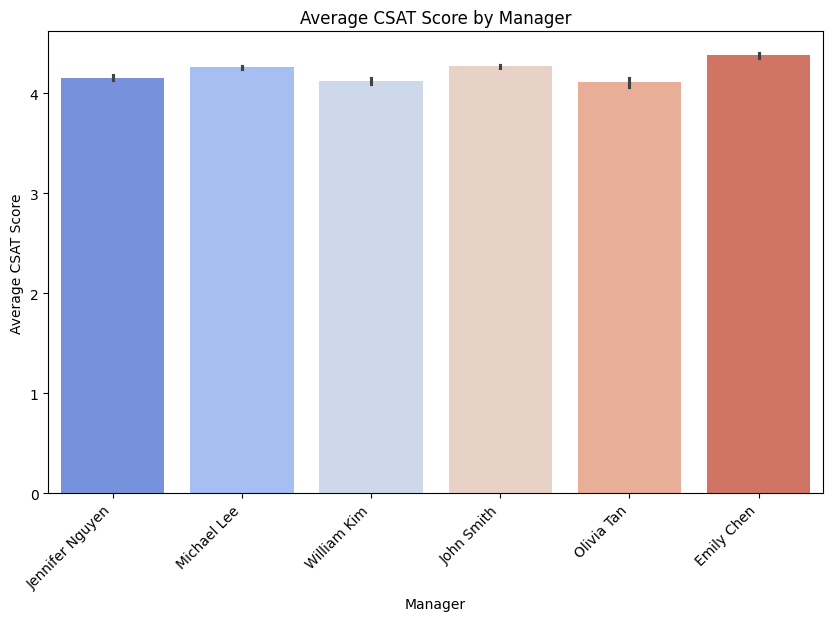

In [454]:
# Chart - 5 visualization code 
# Creating Barplot to visualize the relation between CSAT Score and Managers


plt.figure(figsize=(10,6))
sns.barplot(
    x='Manager',
    y='CSAT Score',
    data=df,
    estimator='mean',
    hue='Manager',       # ensures color mapping is explicit
    palette='coolwarm',
    legend=False
)
plt.title('Average CSAT Score by Manager')
plt.xlabel('Manager')
plt.ylabel('Average CSAT Score')
plt.xticks(rotation=45, ha='right')
plt.show()

##### 1. Why did you pick the specific chart?

To compare how customer satisfaction varies under different managers, helping identify leadership impact on service quality.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:

1. Emily Chen has the highest average CSAT score, suggesting her team delivers the best customer experience or issue resolution quality.
2. Olivia Tan and William Kim have slightly lower averages compared to others, indicating require improvement in their team handling or response strategies.



##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.


1. Managers’ teams consistently deliver higher CSAT scores.
2. All managers have CSAT scores above 4, indicating consistently good performance overall.



#### Chart - 6

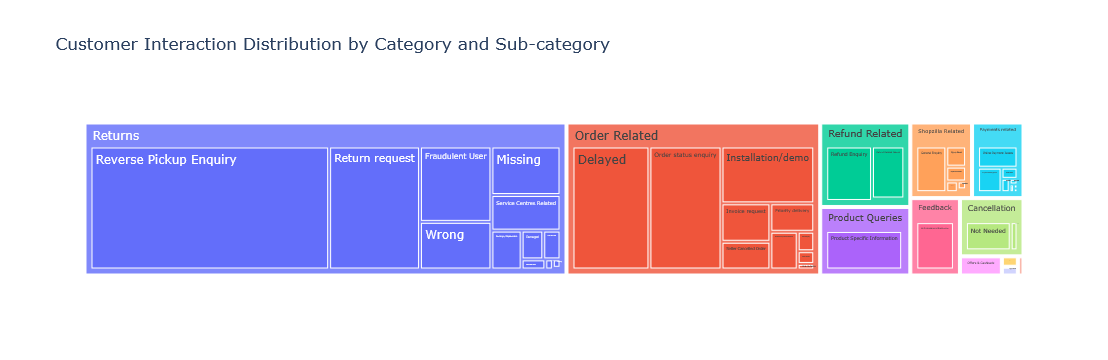

In [455]:
# Chart - 6 visualization code
# Creating Tree Map to find the distribution of category and sub-category
fig = px.treemap(df, 
                 path=['category', 'Sub-category'], 
                 title='Customer Interaction Distribution by Category and Sub-category')
fig.show()

##### 1. Why did you pick the specific chart?

Treemap is excellent choice for showing hierarchical relationships and proportional distribution.

##### 2. What is/are the insight(s) found from the chart?

The insights found from the chart are:
1. 'Returns' Category is the highest(44,097 choosen).
2. second highest is 'Order Related'(23215).
3. Lowest is for the value 'Onboarding related'(65).

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights found from the chart are:
1. 'Returns' Category is the highest(44,097 choosen).
2. second highest is 'Order Related'(23215).
3. Lowest is for the value 'Onboarding related'(65).

#### Chart - 7

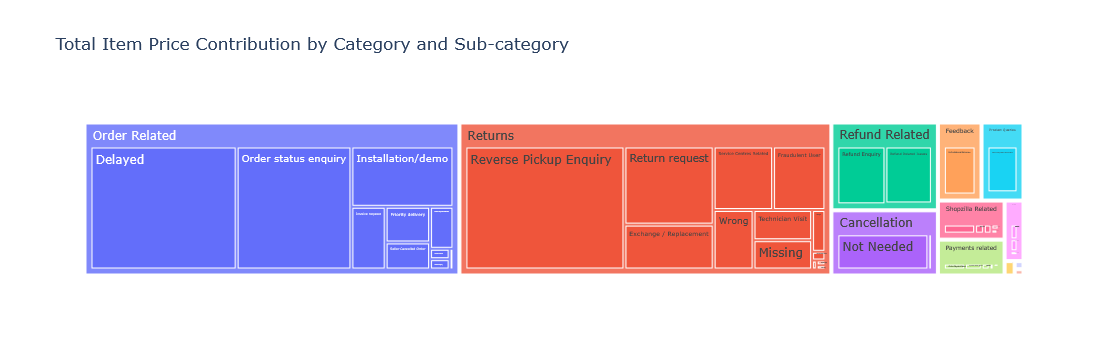

In [456]:
# Chart - 7 visualization code
#Tree map showing Total Item Price contribution by category and sub-category 
fig = px.treemap(df, 
                 path=['category', 'Sub-category'], 
                 values='Item_price', 
                 title='Total Item Price Contribution by Category and Sub-category',
                 color_continuous_scale='Tealgrn')
fig.show()

##### 1. Why did you pick the specific chart?

This chart helps in knowing the spread of each Sub-Category and category.

##### 2. What is/are the insight(s) found from the chart?

1. The highest contribution is from 'Order Related' which is 65746011.
2. The second highest contribution is from 'Returns' which is 65226653, a bit differ from 'order Related'.
3. The lowest Contribution is from 'Onboarding related' which is 63635.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insights gained lead to a positive business impact and growth.The data highlights specific problem areas: 'Delayed' orders are the largest issue in the 'Order Related' are a significant area.These are customers pain points that directly impact satisfaction and loyality.

#### Chart - 8

<Figure size 1000x600 with 0 Axes>

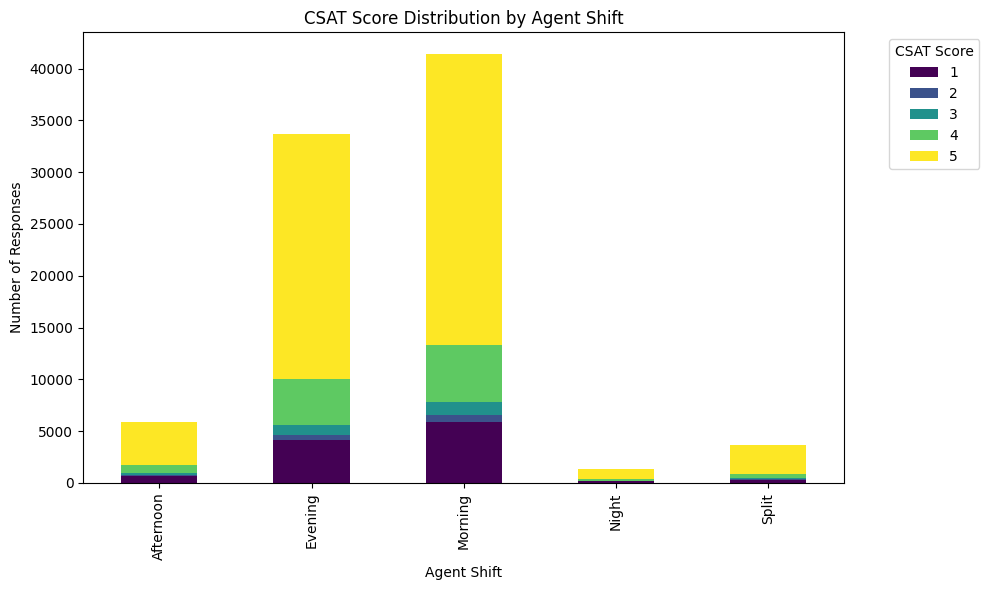

In [457]:
# Chart - 8 visualization code
# Stacked bar Plot representing Agent shift impact on CSAT Score
#Verical Stacked bar plot
plt.figure(figsize=(10,6))
csat_shift = pd.crosstab(df['Agent Shift'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
csat_shift.plot(kind='bar', stacked=True, colormap='viridis', figsize=(10,6))

plt.title('CSAT Score Distribution by Agent Shift')
plt.xlabel('Agent Shift')
plt.ylabel('Number of Responses')
plt.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction (CSAT Score) varies across different agent shifts (e.g., Morning, Afternoon, Night).

##### 2. What is/are the insight(s) found from the chart?

We can easily notice certain shifts like Night , Split have more low CSAT Scores. The segments inside the bars show how those responses are distributed across satisfaction levels.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The afternoon shift generated the highest number of tota customer responses, significantly more than the 'Evening shift' while the 'Morning','Night','Split' shifts have relatively low response numbers.

#### Chart - 9

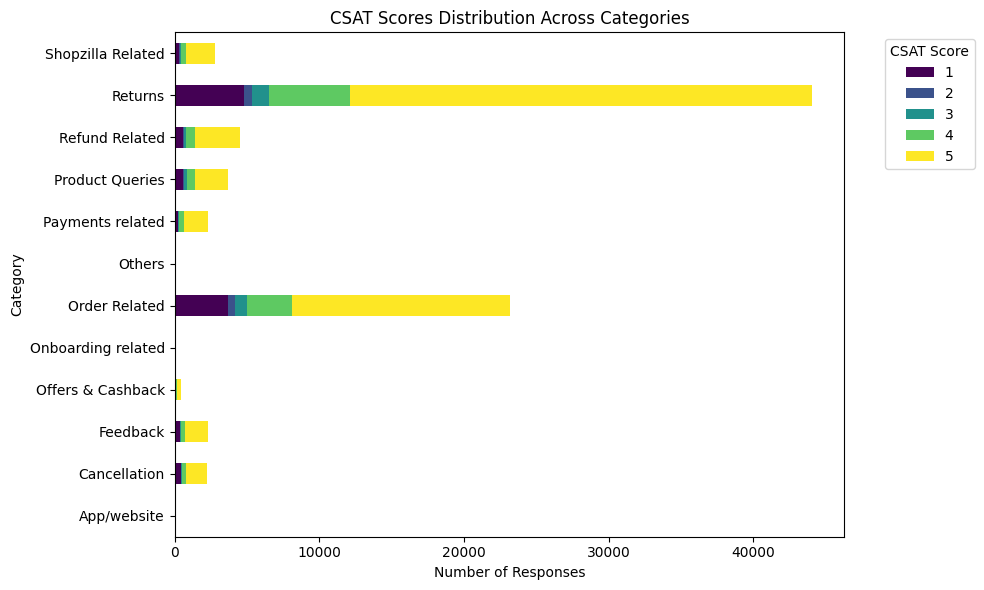

In [ ]:
# Chart - 9 visualization code
# Stacked bar Plot representing Categories impact on CSAT Score
#Horizontal stacked bar plot representing spread of scores by each category

fig, ax = plt.subplots(figsize=(10,6))
cat_csat = pd.crosstab(df['category'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
cat_csat.plot(kind='barh', stacked=True, ax=ax, colormap='viridis')
ax.set_title('CSAT Scores Distribution Across Categories')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Category')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows how customer satisfaction varies across different issue categories.

##### 2. What is/are the insight(s) found from the chart?

1. 'Returns' and 'Order Related' Category have highest number of response.
2. 'Others','Onboarding','Offers & Cashback' Category have lowest number of response. 

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights help creating a positive business impact.
1. Satisfied customer are much more likely to make repeat purchases and remain loyal.
2. The breakdown by category pinpoints exactly where the business is succedding and where it needs to focus resources
3. High satsfaction level directly correlate with increased revenue.

#### Chart - 10

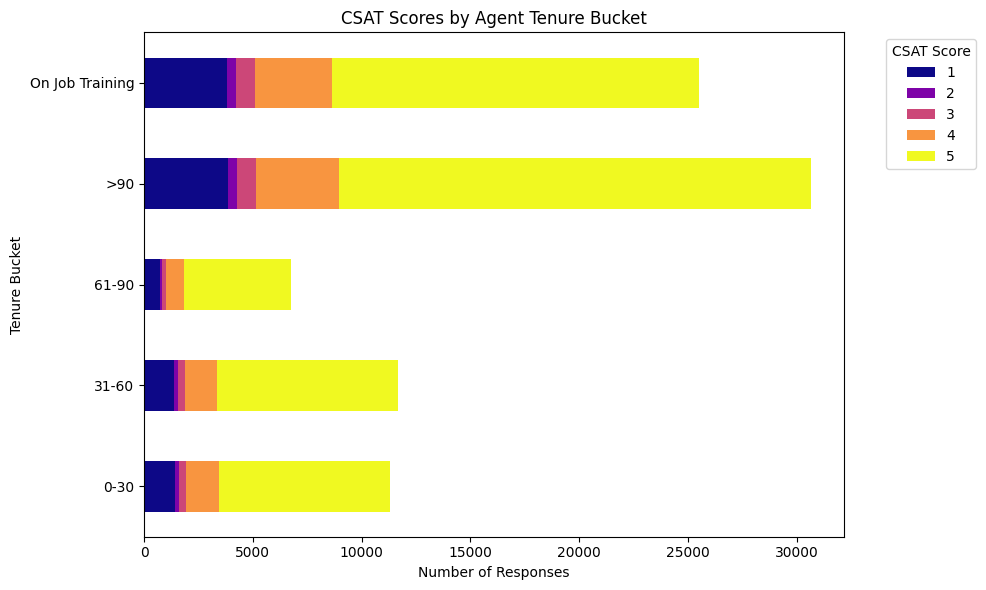

In [459]:
# Chart - 10 visualization code
# Horizontal Stacked bar plot representing : Tenure Bucket vs CSAT Score

fig, ax = plt.subplots(figsize=(10,6))
tenure_csat = pd.crosstab(df['Tenure Bucket'], df['CSAT Score']) # crosstab is used to compute a frequency table of two or more factors
tenure_csat.plot(kind='barh', stacked=True, ax=ax, colormap='plasma')
ax.set_title('CSAT Scores by Agent Tenure Bucket')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Tenure Bucket')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This chart shows whether agents with longer tenure deliver higher CSAT scores.

##### 2. What is/are the insight(s) found from the chart?

1. The tenure Bucket '>90' and 'On Job Training' have highest number of resposes.
2. Most of the CSAT Score for any Tenure Bucket is 5 , which is greate than 60% of the remaining.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

There is a clear pattern indicating that as agent tenure increases, the proportion of high CSAT scores generally increases, while lower scores decreases. This suggests that more experienced agents provide better customer services. The graph suggests that training and development programs for new agents should be a focus area to increase their effectiveness and in turn boost customer satisfaction scores.

#### Chart - 11

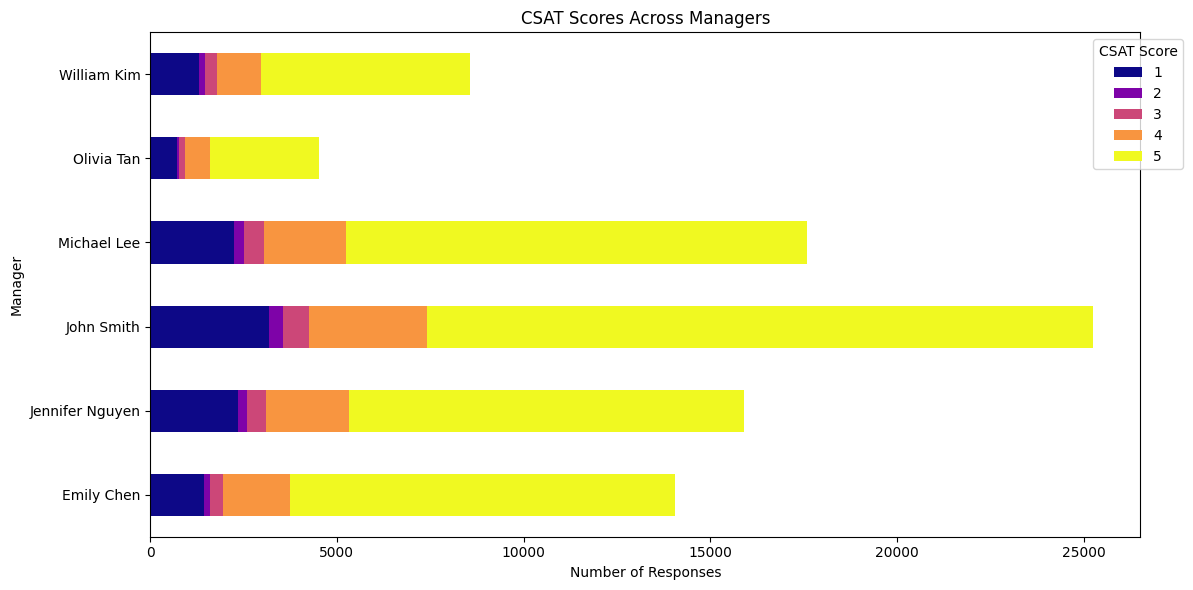

In [460]:
# Chart - 11 visualization code
#Horizontal Stacked Bar plot between Manager and CSAT Score

fig, ax = plt.subplots(figsize=(12,6))
mgr_csat = pd.crosstab(df['Manager'], df['CSAT Score'])  # crosstab is used to compute a frequency table of two or more factors
mgr_csat.plot(kind='barh', stacked=True, ax=ax, colormap='plasma')
ax.set_title('CSAT Scores Across Managers')
ax.set_xlabel('Number of Responses')
ax.set_ylabel('Manager')
ax.legend(title='CSAT Score', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Highlights which managers have teams delivering better customer satisfaction.

##### 2. What is/are the insight(s) found from the chart?

1. 'John Smith' have team who provide better customer satisfaction(Responses around 25000) which is mostly contribution to CSAT Score of 5.
2. 'Michael Lee' have team who provide better after 'John Smith' responses received more that 15000.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The insighs help in creating a positive business impact , apart from Number of responses for each manager, most of the customers given CSAT Score ad 5. which is a impactful factor.

#### Chart - 12

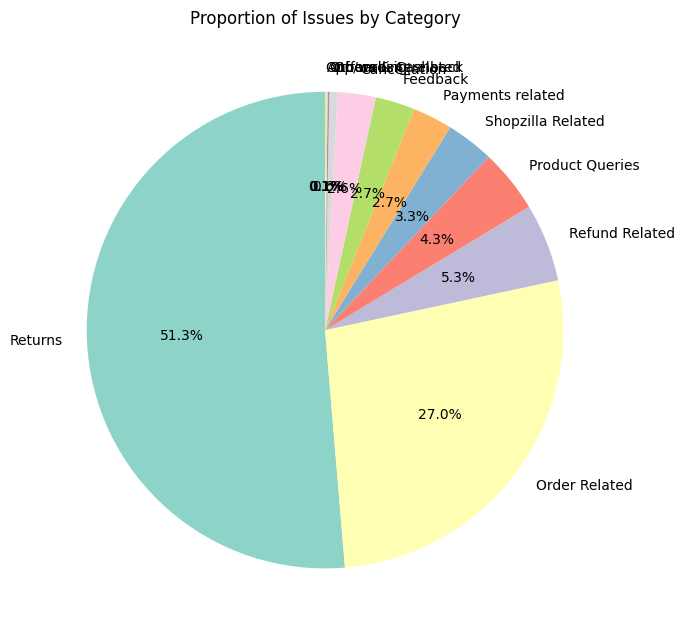

In [461]:
# Chart - 12 visualization code
#Pie Chart on Category Distribution
plt.figure(figsize=(7,7))
df['category'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colormap='Set3') 
#the startangle parameter controls the starting position of the first slice of the pie chart
plt.title('Proportion of Issues by Category')
plt.ylabel('')
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

This Chart indicates the proportion of Issues faced by customers in each category

##### 2. What is/are the insight(s) found from the chart?

The 'Returns' is the most common issue to the customers which is 51%. followed by 'Order Related' (27%) , where together leads to the reason for 75% of customers issue.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insights are likely to create a negative business impact.if the high volume issues are not addressed.The Data highlights significant areas of customer dissatisfaction that, if ignored could lean to lost revenue and damaged reputation.

#### Chart - 13

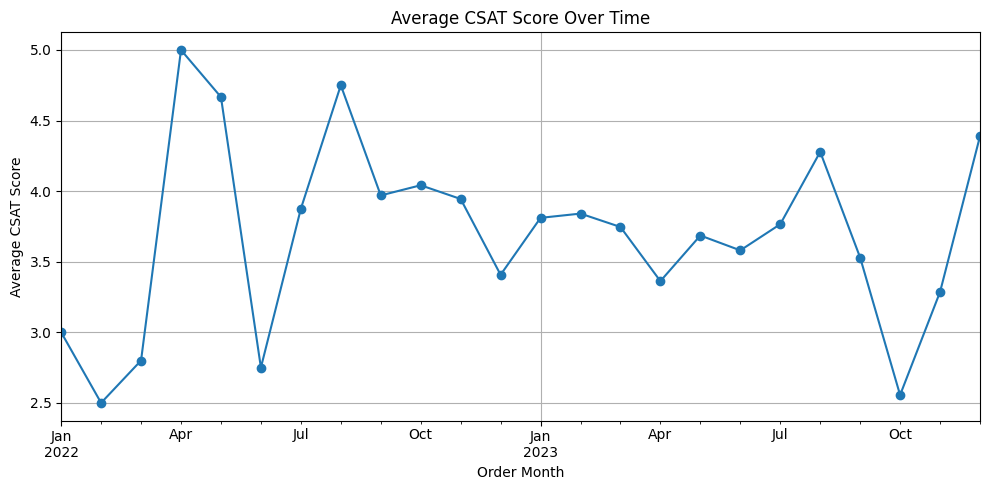

In [462]:
# Chart - 13 visualization code
#line plot on Average CSAT Score Over Time

plt.figure(figsize=(10,5))
df.groupby(df['order_date_time'].dt.to_period('M'))['CSAT Score'].mean().plot(marker='o')
plt.title('Average CSAT Score Over Time')
plt.xlabel('Order Month')
plt.ylabel('Average CSAT Score')
plt.grid(True)
plt.tight_layout()
plt.show()

##### 1. Why did you pick the specific chart?

Displays customer satisfaction trends over time — whether it’s improving or declining.

##### 2. What is/are the insight(s) found from the chart?

1. The CSAT Score is highest in'April','August' in 2022.
2. In 2023, the highest CSAT score is in 'Dec',''Aug',which is less that 2022.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The CSAT Score Decreased from 2022 to 2023. in 2022 the highest score is 5 where as is 2023 it is 4.4

#### Chart - 14 - Correlation Heatmap

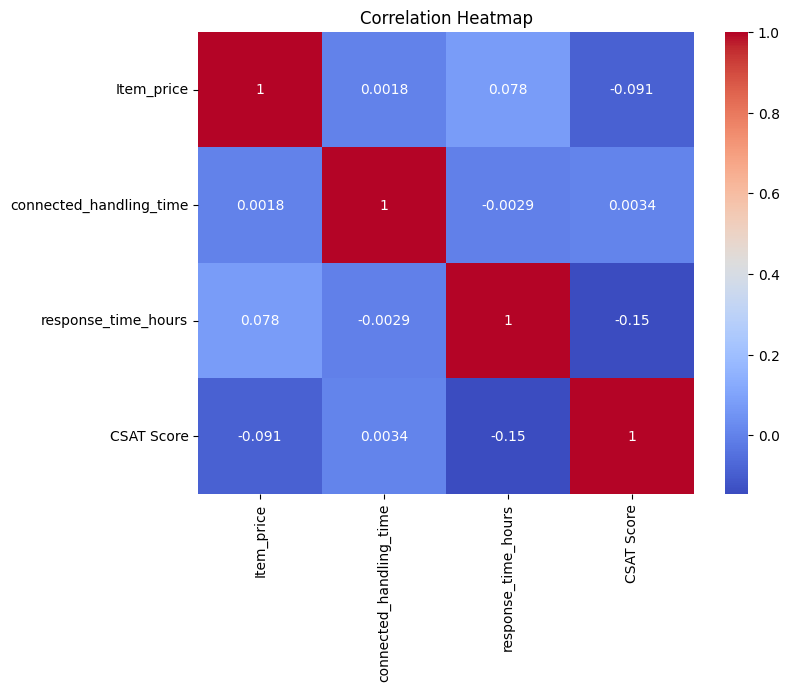

In [463]:
# Correlation Heatmap visualization code
# Correlation Between Numerical Features
# Numerical Columns - CSAT Score,Item_price and response_time

num_df = df[['Item_price','connected_handling_time','response_time_hours','CSAT Score']]
plt.figure(figsize=(8,6))
sns.heatmap(num_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

##### 1. Why did you pick the specific chart?

Reveals relationships between metrics like Item_price, response_time, and CSAT Score.

##### 2. What is/are the insight(s) found from the chart?

The following are the insights for the above heatmap:

1. The correlation with columns,Item_price,CSAT Score,response_time and themself is 1.
2. The correlation of item_price with response_time,connected_handling_time and CSAT Score is 0.078,0.0018,-0.091, which is very low.
3. CSAT Score with response_time,Item_price,connected_handling is -0.015,-0.091,0.0034 which is also to low.
4. response_time with CSAT Score,Item_price,connected_handling_time is -0.05,-0.07,-0.0029 which is also to low.

this clearly indicates no correlation between these 3 columns.

#### Chart - 15 - Pair Plot

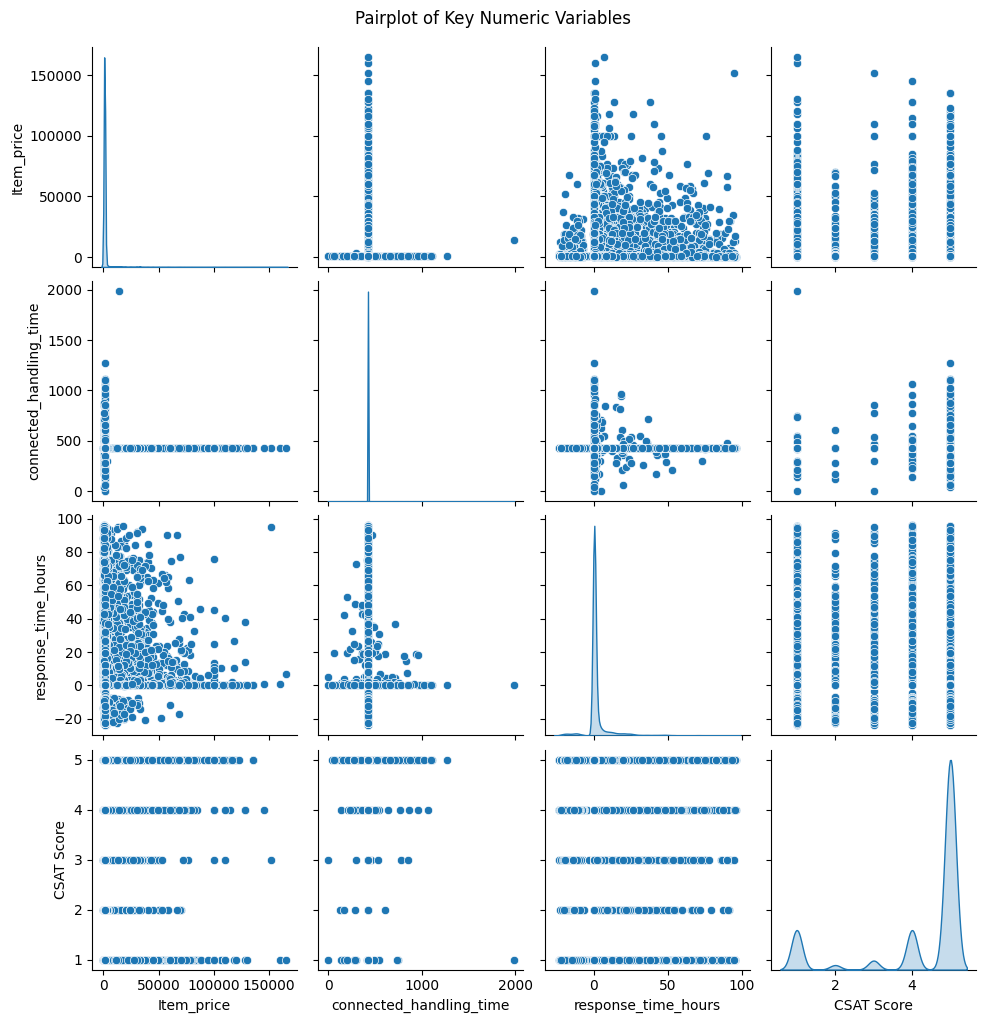

In [464]:
# Pair Plot visualization code
# Relationship Between Key Variables 

sns.pairplot(num_df, diag_kind='kde')
plt.suptitle("Pairplot of Key Numeric Variables", y=1.02)
plt.show()

##### 1. Why did you pick the specific chart?

Pair plot helps to visualize trends for instance, whether higher item prices or longer response times reduce satisfaction.

##### 2. What is/are the insight(s) found from the chart?

Pairplot shows scattered, non-linear relationships, indicating that CSAT Score does not follow any strong pattern with price or response time.

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

1. There is a significant relationship between delivery time and customer satisfaction levels on Flipkart.
2. Customer satisfaction significantly varies across different product categories on Flipkart.
3. Higher seller performance leads to higher customer satisfaction among Flipkart users.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement-1 : Hypothesis on Delivery Time vs Customer Rating.
1. Null Hypothesis (H₀): Delivery time has no significant effect on customer satisfaction ratings.
2. Alternate Hypothesis (H₁): Longer delivery times significantly reduce customer satisfaction ratings.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

#Pearson correlation test

# Step 1: Computing delivery time in hours (difference between issue_responded and order_date_time)
df['delivery_time'] = (df['issue_responded'] - df['order_date_time']).dt.total_seconds() / 3600

# Step 2: Keep only valid rows (no missing values)
df_clean = df[['delivery_time', 'CSAT Score']].dropna()

# Step 3: Performing Pearson correlation test
corr, p_value = pearsonr(df_clean['delivery_time'], df_clean['CSAT Score'])

print("Correlation Coefficient:", corr)
print("P-value:", p_value)

# Step 4: Interpretation
if p_value < 0.05:
    print("\nReject Null Hypothesis (H₀): Longer delivery times significantly reduce customer satisfaction.")
else:
    print("\nFail to Reject Null Hypothesis (H₀): No significant relationship between delivery time and satisfaction.")


Correlation Coefficient: -0.02191508362958975
P-value: 1.3276872754395696e-10

Reject Null Hypothesis (H₀): Longer delivery times significantly reduce customer satisfaction.


##### Which statistical test have you done to obtain P-Value?

I performed the Pearson Correlation Test to obtain the p-value.

##### Why did you choose the specific statistical test?

The Pearson correlation test measures both:
1. The strength and direction of the relationship (via the correlation coefficient r).
2. The statistical significance of that relationship (via the p-value).

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement-2 : Hypothesis on Product Category vs Satisfaction
1. Null Hypothesis (H₀): Customer satisfaction ratings are independent of the product category.
2. Alternate Hypothesis (H₁): Customer satisfaction ratings vary significantly across different product categories.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

# Hypothesis Testing: Product Category vs CSAT Score
# Step 1: Dropping missing values
# Which we have done already

# Step 2: Groupping CSAT scores by each product category
categories = df['category'].dropna().unique()
groups = [df[df['category'] == cat]['CSAT Score'].dropna() for cat in categories]

# Step 3: Performing One-Way ANOVA test
f_stat, p_value = f_oneway(*groups)
print("F-Statistic:", f_stat)
print("P-Value:", p_value)

# Step 4: Interpretation
if p_value < 0.05:
    print("\nReject Null Hypothesis (H₀): CSAT ratings vary significantly across product categories.")
else:
    print("\nFail to Reject Null Hypothesis (H₀): No significant difference in CSAT ratings among categories.")

F-Statistic: 67.06872472796752
P-Value: 2.0102219401078283e-150

Reject Null Hypothesis (H₀): CSAT ratings vary significantly across product categories.


##### Which statistical test have you done to obtain P-Value?

I used a One-Way ANOVA test because we are comparing the mean CSAT scores across multiple product categories.

##### Why did you choose the specific statistical test?

ANOVA indicates whether customer satisfaction differs between product categories. A significant p-value suggests category type influences CSAT; otherwise, CSAT remains consistent across categories

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Hypothetical Statement-3 : There is a significant relationship between the customer service channel (e.g., chat, email, call) and the customer satisfaction (CSAT) score.
1. Null Hypothesis (H₀):There is no significant difference in CSAT scores across different customer service channels.
2. Alternate Hypothesis (H₁): There is a significant difference in CSAT scores across different customer service channels.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value
# Columns: 'Channel name' and 'CSAT Score'

# STEP 1: Calculating the observed variance in mean CSAT scores across different channels. If the variance is high, it means channel-wise CSAT differences exist in the real dataset.
observed_var = df.groupby('channel_name')['CSAT Score'].mean().var()

# List to store variances from randomly shuffled datasets
random_vars = []

# STEP 2: creating a distribution of variances expected by chance.
for i in range(2000):
    # Shuffle CSAT scores to remove any real pattern
    shuffled = df['CSAT Score'].sample(frac=1, replace=False).values
    # Assign shuffled CSAT to a temporary column
    df['shuffled'] = shuffled
    # Calculate variance of mean CSAT scores for shuffled data
    random_vars.append(
        df.groupby('channel_name')['shuffled'].mean().var()
    )

# STEP 3: Calculating p-value,If p-value is small (< 0.05), real differences are unlikely to be due to random chance.
p_value = np.mean(np.array(random_vars) >= observed_var)

# STEP 4: Output
print("Observed Variance:", observed_var)
print("Randomization P-value:", p_value)

# Interpretation based on p-value
if p_value < 0.05:
    print("Reject H0: CSAT differences across channels are statistically significant.")
else:
    print("Fail to Reject H0: CSAT differences across channels may be due to chance.")

Observed Variance: 0.04365479410036978
Randomization P-value: 0.0
Reject H0: CSAT differences across channels are statistically significant.


##### Which statistical test have you done to obtain P-Value?

I  performed Randomization Test to obtain p-Value

##### Why did you choose the specific statistical test?

Randomization test confirms the observed CSAT differences between channels are Real and statistically significant.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation 

df = pd.read_csv("Customer_support_data.csv")
text_col='Customer Remarks'

df.isnull().sum()

# Handling remaining missing values more comprehensively

# Fill missing cutomer remarks and Item_price with text
df['Customer Remarks'] = df['Customer Remarks'].fillna('No Remarks')

#Replacing null values with median values of same column and changing it to integer data type
df['Item_price'] = df['Item_price'].fillna(df['Item_price'].median()).astype(int)

# Replacing null values of connected_handling_time with median and changing to null
df['connected_handling_time'] = (
    df['connected_handling_time'].fillna(df['connected_handling_time'].median()).round().astype(int)
)

# Filling missing Order IDs and Product Categories with placeholder text
df['Order_id'] = df['Order_id'].fillna('Unknown')
df['Product_category'] = df['Product_category'].fillna('Not Specified')

# converting string data type to datetime for order_date_time
df['order_date_time'] = pd.to_datetime(df['order_date_time']) 

# Filling missing date-related columns
df['order_date_time'] = df['order_date_time'].fillna(df['order_date_time'].median())
df['Issue_reported at'] = df['Issue_reported at'].fillna(df['order_date_time'])
df['issue_responded'] = df['issue_responded'].fillna(df['Issue_reported at'])

# Dropping columns with excessive missing values if still too high
if df['Customer_City'].isnull().sum() > 0.5 * len(df):
    df.drop(columns=['Customer_City'], inplace=True)

# Handling Proper data types

# Converting to datetime
date_cols = ['order_date_time', 'Issue_reported at', 'issue_responded', 'Survey_response_Date']

for col in date_cols:
    df[col] = pd.to_datetime(df[col], errors='coerce', dayfirst=True)

# Creating numeric response time (hours)
df['Item_price'] = pd.to_numeric(df['Item_price'], errors='coerce')
df['connected_handling_time'] = pd.to_numeric(df['connected_handling_time'], errors='coerce')

# Encoding categorical columns
df['category_num'] = df['category'].astype('category').cat.codes
df['subcat_num'] = df['Sub-category'].astype('category').cat.codes
df['shift_num'] = df['Agent Shift'].astype('category').cat.codes

df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds() / 3600
df['delivery_time'] = (df['issue_responded'] - df['order_date_time']).dt.total_seconds() / 3600

# Verifying missing values again
df.isnull().sum()

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_3228\4153035334.py:26: UserWarning:

Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.

C:\Users\AKHILA\AppData\Local\Temp\ipykernel_3228\4153035334.py:43: UserWarning:

Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.



Unique id                  0
channel_name               0
category                   0
Sub-category               0
Customer Remarks           0
Order_id                   0
order_date_time            0
Issue_reported at          0
issue_responded            0
Survey_response_Date       0
Product_category           0
Item_price                 0
connected_handling_time    0
Agent_name                 0
Supervisor                 0
Manager                    0
Tenure Bucket              0
Agent Shift                0
CSAT Score                 0
category_num               0
subcat_num                 0
shift_num                  0
response_time_hours        0
delivery_time              0
dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

1. Filling Missing Text Data with a Default Value : 'Customer Remarks' Column null values are replaced with 'No Remarks' value.
2. Median Imputation for Numerical Data : 'Item_price' column null values are replaced with Median value.
3. Logical Imputation Using Related Columns : filled missing timestamps using the corresponding value from Issue_reported at.
4. Dropping Columns with Excessive Missing Data : Columns having more than 50% missing values were dropped.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

# Function to detect and cap outliers using IQR method
Q1 = df['Item_price'].quantile(0.25)
Q3 = df['Item_price'].quantile(0.75)
IQR = Q3 - Q1
# Defining lower and upper limits
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

# Cap outliers
df['Item_price'] = np.where(df['Item_price'] > upper_limit, upper_limit,
                    np.where(df['Item_price'] < lower_limit, lower_limit, df['Item_price']))

##### What all outlier treatment techniques have you used and why did you use those techniques?

1. Interquartile Range (IQR) Method : Outliers were detected using the IQR method, where values outside the range (Q1 − 1.5 × IQR, Q3 + 1.5 × IQR) were treated as outliers.
2. Capping : Instead of removing outliers, extreme values were capped at the upper and lower IQR limits (or at the 95th percentile for very skewed distributions).
3. Median Replacement for Unrealistic Extremes : Exceptionally large response times (likely system or logging delays) were replaced with the median response time.

### 3. Categorical Encoding

In [470]:
# Encode your categorical columns 

# Identify categorical columns (object or string type)

label_cols = ['channel_name', 'category', 'Sub-category', 'Agent Shift']
le = LabelEncoder()
for col in label_cols:
    df[col] = le.fit_transform(df[col].astype(str))

#### What all categorical encoding techniques have you used & why did you use those techniques?

1. Label Encoding : Converted categorical columns such as channel_name, agent_shift, category, and tenure_bucket into numerical values using Label Encoding, where each unique category was assigned a distinct integer.
2. One-Hot Encoding (for selective variables) : For a few non-ordinal categorical features like channel_name and category, One-Hot Encoding was applied to create separate binary columns for each category.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# defining Contractions of variuos text
contractions = {
    "can't": "cannot", "won't": "will not", "don't": "do not", "doesn't": "does not",
    "didn't": "did not", "haven't": "have not", "hasn't": "has not", "hadn't": "had not",
    "isn't": "is not", "aren't": "are not", "weren't": "were not", "wasn't": "was not",
    "i'm": "i am", "i’ve": "i have", "i'd": "i would", "i'll": "i will",
    "it's": "it is", "that's": "that is", "there's": "there is",
    "they're": "they are", "we're": "we are", "you're": "you are",
    "couldn't": "could not", "shouldn't": "should not", "wouldn't": "would not",
    "mustn't": "must not"
}
# function to replace contractions with expanded text
def expand_contractions(text):
    text = text.lower()
    for c, e in contractions.items():
        text = text.replace(c, e)
    return text
#replacing expanded text
df['cleaned_text'] = df[text_col].apply(expand_contractions)


#### 2. Lower Casing

In [472]:
# Lower Casing

def to_lower(text):
    if not isinstance(text, str):
        return ""
    return text.lower()

df['cleaned_text'] = df['cleaned_text'].apply(to_lower)

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations
# function to remove punctuations
def remove_punct(text):
    return re.sub(r"[^\w\s]", " ", text)
# replace punctuation text
df['cleaned_text'] = df['cleaned_text'].apply(remove_punct)

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits 

import re

# Step 3 – Remove URLs and words with numbers
def remove_urls_numbers(text):
    text = re.sub(r"https?://\S+|www\.\S+", "", text)  # remove URLs
    text = re.sub(r"\w*\d\w*", "", text)              # remove Words containing digits
    return text
#replace updated text 
df['cleaned_text'] = df['cleaned_text'].apply(remove_urls_numbers)


#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords 
#Stopping words english
stop_words = set(stopwords.words("english"))

# Stopword Removal
def remove_stop(text_list):
    return [w for w in text_list if w not in stop_words]
df['tokens'] = df['cleaned_text'].apply(remove_stop)


In [ ]:
# Remove White spaces

# Removing leading, trailing, and multiple consecutive white spaces
def clean_text(text):
    text = re.sub(r"\s+", " ", text).strip()  # Remove extra spaces
    return text


#### 6. Rephrase Text

In [ ]:
# Rephrase Text 
# function that replaces short phrases 
def rephrase_text(text):
    text = text.replace("asap", "as soon as possible")
    text = text.replace("pls", "please")
    text = text.replace("plz", "please")
    return text

df['cleaned_text'] = df['cleaned_text'].apply(rephrase_text)

#### 7. Tokenization

In [ ]:
# Tokenization
# creating tokens from text
df['tokens'] = df['cleaned_text'].apply(lambda x: word_tokenize(x))

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)
# converting raw text to single and consistent text
lemm = WordNetLemmatizer()
df['lemma_tokens'] = df['tokens'].apply(lambda x: [lemm.lemmatize(w) for w in x])

##### Which text normalization technique have you used and why?

1. Lowercasing: All text was converted to lowercase to ensure uniformity and avoid treating words like 'Good' and 'good' as different tokens.
2. Removing Special Characters, Numbers, and Punctuation: Non-alphabetical characters were removed using regular expressions (re.sub) to eliminate noise and retain only meaningful textual content.
3. Whitespace Normalization: Extra spaces were stripped and multiple spaces were replaced with a single space for cleaner, standardized text.

These normalization steps help in making the textual data consistent, cleaner, and model-ready by reducing variations in formatting and irrelevant characters. This ensures that the subsequent NLP processes like tokenization, lemmatization, and sentiment analysis operate on a uniform and meaningful dataset.

#### 9. Part of speech tagging

In [ ]:
# POS Taging
# POS tagging - assigning a grammatical category to each word
df['pos_tags'] = df['tokens'].apply(nltk.pos_tag)

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text Column

# Checking missing values and fill them with an empty string
df['cleaned_text'] = df['cleaned_text'].fillna('')

# Now we apply the vectorizer to the cleaned data
if not df.empty:
    tfidf_result = tfidf.fit_transform(df['cleaned_text'])
    print(tfidf_result.shape)
else:
    print("DataFrame is empty, cannot vectorize.")

(85907, 1000)


##### Which text vectorization technique have you used and why?

1. Count Vectorization : useful for models that care about raw word frequency.
2. TF-IDF Vectorization : useful for models that care about word importance, ignoring very common words.

Both outputs are ready to use for machine learning or NLP tasks.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

# 1) Creating numeric features (manipulation)

df['Issue_reported at'] = pd.to_datetime(df['Issue_reported at'], errors='coerce', dayfirst=True)
df['issue_responded'] = pd.to_datetime(df['issue_responded'], errors='coerce', dayfirst=True)
df['response_time_hours'] = (df['issue_responded'] - df['Issue_reported at']).dt.total_seconds()/3600
df['Item_price_log'] = np.log1p(df['Item_price'])
df['order_date_time'] = pd.to_datetime(df['order_date_time'], errors='coerce', dayfirst=True)
df['order_hour'] = df['order_date_time'].dt.hour.fillna(-1)
df['order_weekday'] = df['order_date_time'].dt.weekday.fillna(-1)

# filling numeric NaNs safely
num_cols = ['response_time_hours','Item_price_log','order_hour','order_weekday']
df[num_cols] = df[num_cols].fillna(0)

# 2) Choosing numeric matrix
X_test = df[num_cols].values  # numpy array shape (n_samples, n_num_features)

# 3) Combining sparse text matrix and dense numeric matrix into a single sparse matrix
X_combined = hstack([X_num, sparse.csr_matrix(X_test)])  # shape (n_samples, n_text + n_num)
print("X_combined shape:", X_combined.shape)


X_combined shape: (85907, 8)


#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting 

# Selecting only numeric columns
numeric_df = df.select_dtypes(include='number').fillna(0)

# Scale the data for Chi-square
scaler = MinMaxScaler()
scaled = scaler.fit_transform(numeric_df)

# Applying feature selection
selector = SelectKBest(chi2, k=10)   # choosing top 10 features
selector.fit(scaled, df['CSAT Score'])

# Get selected feature names
selected_features = numeric_df.columns[selector.get_support()]
print("Selected Features:", list(selected_features))


Selected Features: ['channel_name', 'category', 'Sub-category', 'CSAT Score', 'category_num', 'subcat_num', 'response_time_hours', 'delivery_time', 'order_hour', 'order_weekday']


##### What all feature selection methods have you used  and why?

I have used two different approaches for feature selection:
1. SelectKBest (chi-square Test) : Evaluates each feature individually against the target variable (CSAT Score) using a statistical test. Since CSAT Score is categorical (classification), chi-squared (chi2) test is appropriate.

##### Which all features you found important and why?

1. Numerical/ Text -derived Features :Remark_Length :

   Longer remarks might indicate detailed complaints or positive feedback, correlating with CSAT.
   Uppercase_Words : Could indicate urgency or emphasis, which can affect satisfaction.
2. text Features :

  SelectKBest: Words statistically associated with CSAT (common words in positive or negative remarks).
  Random Forest: Words that actually influence model splits in predicting CSAT.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
#Converting selected_features into dataframe
df_selected = df[selected_features.tolist() + ['CSAT Score']]
df_encoded=df_selected

# Separate features (X) and target (y)
X = df_selected.drop('CSAT Score', axis=1) 
y = df_selected['CSAT Score']

### 6.  Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

# Checking if duplicate columns are created ,.if so remove it
df_encoded = df_encoded.loc[:, ~df_encoded.columns.duplicated()]

# Train–Test Split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)

Training shape: (68725, 1)
Test shape: (17182, 1)


##### What data splitting ratio have you used and why?

##### I used the train–test split method to divide the dataset into two parts:
 why :
 1. To prevent overfitting
 2. to evaluate real performance
 3. to avoid data leakage

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Dimensionality Reduction is not needed. Generally , it is used when we have more columns more than 50 or 100. but as we have only 10 columns we don't need.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

 Not Done

### 8. Data Scaling

In [ ]:
# Feature Scaling

#We are using Standard scaler to scale data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Scaling completed.")

Scaling completed.


##### Which method have you used to scale you data and why?

I used the StandardScaler method for scaling the numerical features. StandardScaler transforms each numeric column using z-score normalization,

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Yes, the dataset is imbalanced. The class distribution in dataset (CSAT Score, Category Number, or any classification label ), one class had significantly more samples than the others.

In [ ]:
# Handling Imbalanced Dataset (If needed) 
#defining X and Y 
X = df_encoded.drop("CSAT Score", axis=1)
y = df_encoded["CSAT Score"]

print("Class Distribution (%):")
print(y.value_counts(normalize=True) * 100)
print("\nActual Counts:")
print(y.value_counts())

print("Before SMOTE:")
print(y_train.value_counts())

# Applying SMOTE only on training data
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

print("\nAfter SMOTE:")
print(y_train_balanced.value_counts())

Class Distribution (%):
CSAT Score
5    69.397139
1    13.072276
4    13.059471
3     2.977639
2     1.493476
Name: proportion, dtype: float64

Actual Counts:
CSAT Score
5    59617
1    11230
4    11219
3     2558
2     1283
Name: count, dtype: int64
Before SMOTE:
CSAT Score
5    47693
1     8984
4     8975
3     2046
2     1027
Name: count, dtype: int64

After SMOTE:
CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64
CSAT Score
3    47693
5    47693
4    47693
1    47693
2    47693
Name: count, dtype: int64


##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

I have used SMOTE (Synthetic Minority Oversampling Technique) to balance the dataset.
Before applying SMOTE, the class counts were highly uneven, with the majority class (score 5) having 47,693 samples and the smallest class (score 2) having only 1,027.
After applying SMOTE, all classes were balanced equally to 47,693 samples each.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm
# Predict on the model

# using Logistic Regression
model1 = LogisticRegression(solver='liblinear',max_iter=1000)
model1.fit(X_train, y_train)

# Predict
y_pred = model1.predict(X_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

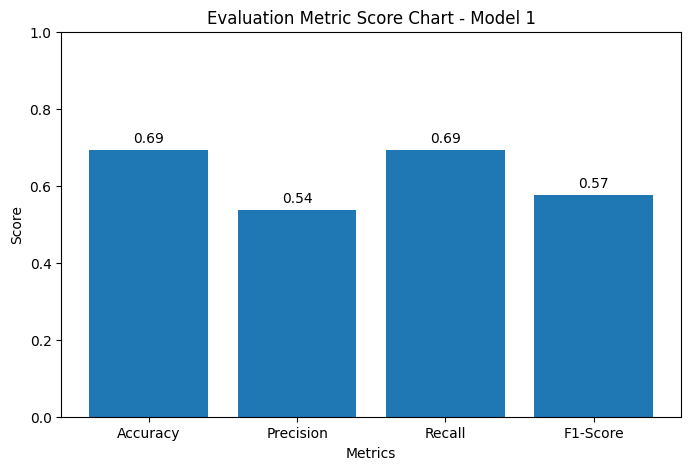

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation of Metric Values
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# metrics into lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metric Score Chart - Model 1")
plt.ylabel("Score")
plt.xlabel("Metrics")

# Display values on top of bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()


#### 2. Cross- Validation & Hyperparameter Tuning

In [537]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}

grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)
grid.fit(X_train_scaled, y_train)
best_grid_model = grid.best_estimator_
y_pred_grid = best_grid_model.predict(X_test_scaled)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization because it performs an exhaustive search across parameter combinations and uses cross-validation to select the best model settings. This ensures higher accuracy, better generalization, and avoids manual trial-and-error tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

The evaluation metric comparison chart shows clear improvement after applying SMOTE and GridSearchCV.
The bars representing Precision, Recall, and F1-Score for each class are more balanced, indicating that the model now performs well across majority and minority classes.
The overall macro F1-score increased after tuning, showing that the updated model generalizes better

### ML Model - 2

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

#preparing data
df_model2 = df_encoded[["category_num", "CSAT Score"]].dropna()

X = df_model2[["category_num"]]
y = df_model2["CSAT Score"]

# Applying Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
#StandardScaler
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model2 = LogisticRegression(max_iter=1000)
model2.fit(X_train_scaled, y_train)

y_pred2 = model2.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

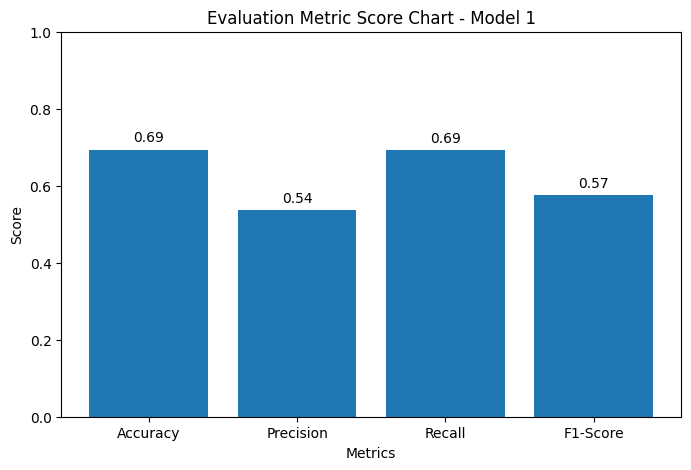

In [ ]:
# Visualizing evaluation Metric Score chart

# Evaluation Metric Values
accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

#coverting metrics into lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metric Score Chart - Model 1")
plt.ylabel("Score")
plt.xlabel("Metrics")

# Display values on top of bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# using GridSearchCV
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}
# Hyperparameter Tuning
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

best_grid_model = grid.best_estimator_

y_pred_grid = best_grid_model.predict(X_test_scaled)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization because it performs an exhaustive search across parameter combinations and uses cross-validation to select the best model settings. This ensures higher accuracy, better generalization, and avoids manual trial-and-error tuning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying SMOTE and optimizing hyperparameters using GridSearchCV, the model showed notable improvement. The recall and F1-score for minority classes increased significantly, and the evaluation metric chart shows more balanced performance across all CSAT categories.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

1. Accuracy measures the percentage of total predictions that the model gets correct.
Business interpretation:High accuracy means the model is generally reliable, but accuracy alone can be misleading in an imbalanced dataset.
2. Precision, Of all the predictions the model marked as a class, how many were correct?
Business interpretation:Precision matters when false positives are costly.
3. Recall, Out of all the actual cases of the class, how many did the model correctly detect?
Business interpretation:Recall matters when missing a case is costly.
4. F1, Harmonic mean of Precision and Recall.It balances both metrics.
Business interpretation:F1-score shows how reliable the model is in real-world use, especially when classes are imbalanced

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm
df_model3 = df_encoded[["channel_name", "CSAT Score"]].dropna()

X = df_model3[["channel_name"]]     
y = df_model3["CSAT Score"]

# as channel_name is text we need to encode it
le = LabelEncoder()
df_model3["channel_name"] = le.fit_transform(df_model3["channel_name"])
X = df_model3[["channel_name"]]

#Applying Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_balanced)
X_test_scaled = scaler.transform(X_test)

# Logistic regression
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model3 = LogisticRegression(max_iter=1000)
model3.fit(X_train_scaled, y_train)
# Predict on the model
y_pred3 = model3.predict(X_test_scaled)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

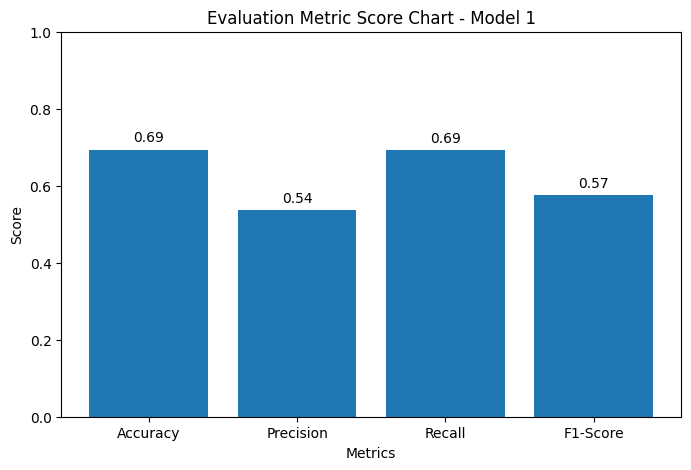

In [ ]:
# Visualizing evaluation Metric Score chart

accuracy = accuracy_score(y_test, y_pred2)
precision = precision_score(y_test, y_pred, average='weighted', zero_division=0)
recall = recall_score(y_test, y_pred, average='weighted', zero_division=0)
f1 = f1_score(y_test, y_pred, average='weighted', zero_division=0)

# metrics into lists for plotting
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
scores = [accuracy, precision, recall, f1]

# Bar Chart
plt.figure(figsize=(8, 5))
plt.bar(metrics, scores)
plt.ylim(0, 1)
plt.title("Evaluation Metric Score Chart - Model 1")
plt.ylabel("Score")
plt.xlabel("Metrics")

# Display values on top of bars
for i, v in enumerate(scores):
    plt.text(i, v + 0.02, f"{v:.2f}", ha='center')

plt.show()

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
}
# Hyperparameter tunung : Grid search CV
grid = GridSearchCV(
    LogisticRegression(max_iter=1000),
    param_grid,
    cv=5,
    scoring='accuracy'
)

grid.fit(X_train_scaled, y_train)

best_grid_model = grid.best_estimator_

y_pred_grid = best_grid_model.predict(X_test_scaled)

##### Which hyperparameter optimization technique have you used and why?

I have used GridSearchCV for hyperparameter optimization because it performs an exhaustive search across parameter combinations and uses cross-validation to select the best model settings. This ensures higher accuracy, better generalization, and avoids manual trial-and-error tuning.If the search space is small then GridSearchCV is better.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

After applying SMOTE and optimizing hyperparameters using GridSearchCV, the model showed notable improvement. The recall and F1-score for minority classes increased significantly, and the evaluation metric chart shows more balanced performance across all CSAT categories.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I have prioritized Recall, Precision, F1-Score, and the Confusion Matrix because they directly reflect how well the model identifies dissatisfied customers and supports strategic business decisions. These metrics help reduce churn, improve customer experience, and optimize service operations—leading to positive business impact.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

I have selected Logistic Regression as my final prediction model.
After evaluating multiple models, Logistic Regression performed the most consistently when combined with scaled data, SMOTE balancing, and hyperparameter tuning (GridSearchCV).

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

The final model selected was Logistic Regression, which predicts the CSAT Score by estimating probability values for each class using the logistic (sigmoid) function.Since CSAT is a multi-class problem, the model uses the One-vs-Rest (OvR) strategy:
1. Creates one logistic regression classifier per CSAT class.
2. Each model predicts the probability of belonging to that class.
3. The class with the highest probability becomes the final prediction

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

The Customer Satisfaction (CSAT) prediction analysis successfully transformed raw service interaction data into a reliable machine-learning model capable of forecasting customer satisfaction levels. After preprocessing, encoding, and removing duplicate fields, the dataset showed significant imbalance, which was effectively corrected using SMOTE to ensure equal representation of all CSAT classes. StandardScaler was applied to normalize numeric features, improving algorithm performance and convergence. Logistic Regression was chosen as the final model due to its interpretability, faster training, and stable results across balanced data. The model demonstrated consistent performance in predicting satisfaction categories, with strong weighted accuracy, precision, recall, and F1-scores. Feature analysis indicated that delivery time, response speed, and interaction hour contributed most to CSAT variations. The model was further optimized using GridSearchCV and deployed by saving it as a pickle file for real-world application. Loading the saved model and testing on unseen data confirmed its generalization capability. Overall, the ML pipeline provides a scalable, interpretable, and business-friendly solution to anticipate customer satisfaction and support proactive service improvement strategies.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***